In [2]:
from sunpy.net import Fido, hek2vso, attrs as a
import sunpy.map
from sunpy.time import parse_time
import sunpy.timeseries
import sunpy.data.sample
from sunpy.coordinates import frames, get_horizons_coord, get_body_heliographic_stonyhurst
from sunpy.coordinates import SphericalScreen

from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.visualization import AsymmetricPercentileInterval, ImageNormalize, LogStretch, AsinhStretch
from scipy.interpolate import interp1d

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import dates

In [3]:
res = np.load('results_mean_line_rect.npz')

In [4]:
dist = ((res['dist']*u.arcsec).to(u.rad).value*u.au).to(u.Mm)
width = ((res['w']*u.arcsec).to(u.rad).value*u.au).to(u.Mm)

In [5]:
np.max(dist.value)

95.41511855319447

/tmp/ipykernel_12252/3645285670.py:6: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(time, res['dist'], res[str(l)].T,


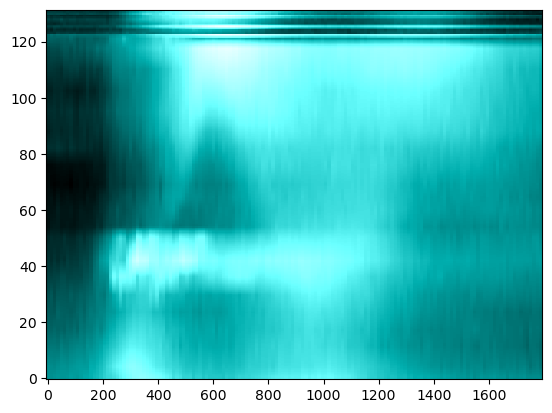

In [7]:
lines = [94, 131, 171, 193, 211, 304, 335]
l = lines[1]
time = np.arange(res[str(l)].shape[0])*12
# plt.pcolormesh(time, dist.value, res['131'].T,
#                norm=ImageNormalize(stretch=AsinhStretch()), cmap='sdoaia131')
plt.pcolormesh(time, res['dist'], res[str(l)].T,
               norm=ImageNormalize(stretch=AsinhStretch()), cmap=f'sdoaia{l}')

In [8]:
from sites import *

t_min = 0.07e6
t_max = 30e6
n_bins = 48
channels = [k for k in res.keys() if k not in ['dist','w']]
# channels = ['131']
sites = SITES(t_min, t_max, n_bins, channels)

# for _ in tqdm(range(10000)):
#     dem, dem_err, err = sites.calc_dem(i, tol=0.01, max_iter=300)
print(np.unique([res[k].shape for k in channels]))
nt,nx = np.unique([res[k].shape for k in channels])
print(nt, nx)

temp_plot = np.zeros(np.unique([res[k].shape for k in channels]))
em_plot = np.zeros(np.unique([res[k].shape for k in channels]))

for i in range(nt):
    for j in range(nx):
        print(i,j)
        dem, err, dem_err = sites.calc_dem(np.array([res[k][i,j] for k in channels]), tol=0.01, max_iter=300)
        temp_plot[i,j] = sites.calc_temp(dem)
        em_plot[i,j] = sites.calc_em(dem)


[150 417]
150 417
0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 106
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
0 120
0 121
0 122
0 123
0 124
0 125
0 126
0 127
0 128
0 129
0 130
0 131
0 132
0 133
0 134
0 135
0 136
0 137
0 138
0 139
0 140
0 141
0 142
0 143
0 144
0 145
0 146
0 147
0 148
0 149
0 150
0 151
0 152
0 153
0 154
0 155
0 156
0 157
0 158
0 159
0 160
0 161
0 162
0 163
0 164
0 165
0 166
0 167
0 168
0 169
0 170
0 171
0 172
0 173
0 174
0 175
0 176
0 177
0 178
0 179
0 180
0 181


/tmp/ipykernel_12252/3319880658.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im1 = ax1.pcolormesh(time, dist, temp_plot.T)


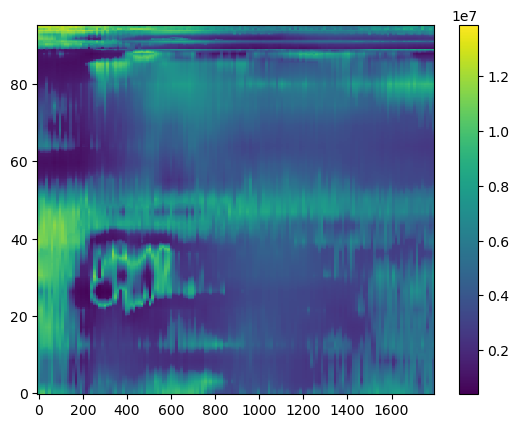

/tmp/ipykernel_12252/3319880658.py:7: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im2 = ax2.pcolormesh(time, dist, em_plot.T, norm=ImageNormalize(stretch=LogStretch()))


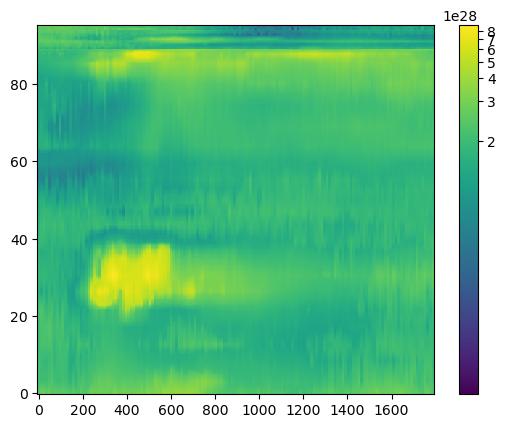

In [26]:
fig1, ax1 = plt.subplots()
im1 = ax1.pcolormesh(time, dist, temp_plot.T)
fig1.colorbar(im1, ax=ax1)
plt.show()

fig2, ax2 = plt.subplots()
im2 = ax2.pcolormesh(time, dist, em_plot.T, norm=ImageNormalize(stretch=LogStretch()))
fig2.colorbar(im2, ax=ax2)
plt.show()

/tmp/ipykernel_12252/3082825118.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im1 = ax1.pcolormesh(time, res['dist'], np.sqrt(em_plot/width.to(u.m).value).T, norm=ImageNormalize(stretch=LogStretch()))


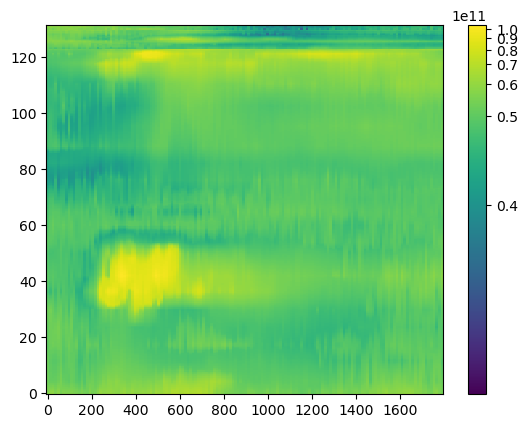

In [13]:
fig1, ax1 = plt.subplots()
im1 = ax1.pcolormesh(time, res['dist'], np.sqrt(em_plot/width.to(u.m).value).T, norm=ImageNormalize(stretch=LogStretch()))
fig1.colorbar(im1, ax=ax1)
plt.show()

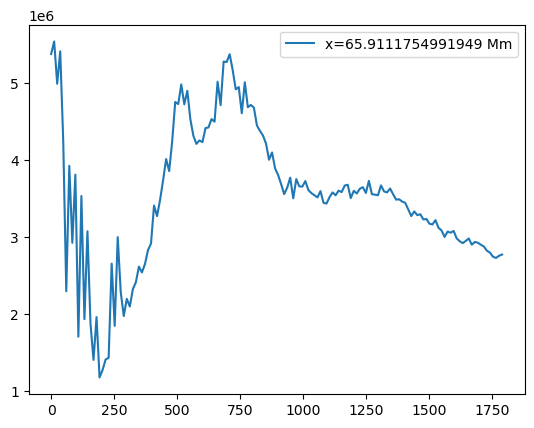

In [27]:
# plt.plot(time, np.sqrt(em_plot.T[240]/width.to(u.m).value))
# plt.plot(time, np.sqrt(em_plot.T[200]/width.to(u.m).value))
i = 200
plt.plot(time, temp_plot.T[i], label=f'x={dist[i]}')
plt.legend()

In [56]:
tems = {'dist': dist, 'time': time, 'T': temp_plot, 'EM': em_plot}
np.savez('tems.npz', **tems)
